In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.power import TTestPower


### Problem 2, Confidence Intervals

In [3]:
DO = np.array([1.8, 2.0, 2.1, 1.7, 1.2, 2.3, 2.5, 2.9, 1.6, 2.2])
meanDO = np.mean(DO)
stdDO = np.std(DO)
n = len(DO)

#### i)

In [10]:
t_critical = stats.t.ppf(1- 0.025, df=n-1)
CI_mean = np.array((meanDO - t_critical * stdDO / np.sqrt(n), meanDO + t_critical * stdDO / np.sqrt(n)))
print('95% CI on the mean is:', CI_mean[0], CI_mean[1])

95% CI on the mean is: 1.7005472717146222 2.3594527282853783


#### ii)

In [13]:
margin_error = t_critical * stdDO / np.sqrt(n)

# New margin of error (10% reduction)
new_margin_error = 0.9 * margin_error

n_new = (t_critical * stdDO / new_margin_error) ** 2
n_new = float(np.ceil(n_new))
print('We would need', n_new, 'additional measurements')


We would need 13.0 additional measurements


#### iii)

In [15]:
median_DO = np.median(DO)

CI_median = np.percentile(DO, [2.5, 97.5])
print('CI on the median', 'lower bound is', CI_median[0], 'upper bound is', CI_median[1])

CI on the median lower bound is 1.29 upper bound is 2.81


#### iv)

In [16]:
#Per chapter 8, we use a chi squared distribution to find a confidence interval on the variance

In [18]:
# Chi-square critical values for 95% confidence
chi2_lower = stats.chi2.ppf(0.025, df=n-1)
chi2_upper = stats.chi2.ppf(0.975, df=n-1)

# Confidence interval for variance
CI_variance = ((n-1) * stdDO**2 / chi2_upper, (n-1) * stdDO**2 / chi2_lower)
CI_variance
print('CI on varaince', 'lower bound is', CI_variance[0], 'upper bound is', CI_variance[1])

CI on varaince lower bound is 0.10034817331557347 upper bound is 0.7068980234199121


#### v)

In [21]:
CI2 = (2.5, 3.2)

print('As the mean CI of the first set is 1.7, 2.4, and the mean CI of the second set 2.5, 3.2, we can say that with 95% confidence, the mean DO is different between the two sets')

As the mean CI of the first set is 1.7, 2.4, and the mean CI of the second set 2.5, 3.2, we can say that with 95% confidence, the mean DO is different between the two sets


### Problem 3: Hypothesis Testing

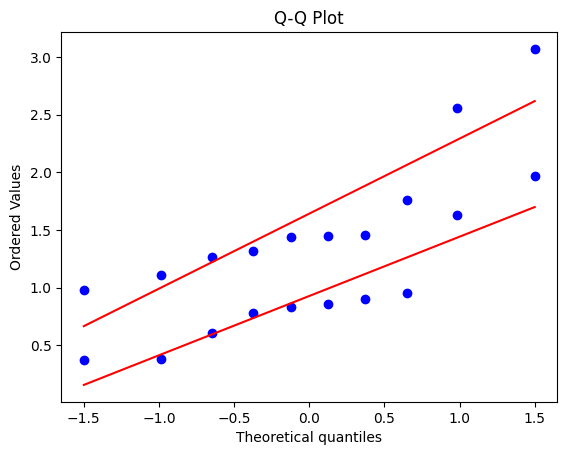

In [27]:
placebo = [0.90, 0.37, 1.63, 0.83, 0.95, 0.78, 0.86, 0.61, 0.38, 1.97]

alcohol = [1.46, 1.45, 1.76, 1.44, 1.11, 3.07, 0.98, 1.27, 2.56, 1.32]
stats.probplot(placebo, dist="norm", plot=plt)
stats.probplot(alcohol, dist="norm", plot=plt)


# Show the plot
plt.title("Q-Q Plot")
plt.show()
 

#### i) Does it appear that alc. consumption increases reaction time? 

In [30]:
#Null Hypothesis: u(alc) = u(placebo) for reaction time
#Alternate Hypothesis: u(alc) > u(placebo)
#Test Statistic: one tailed t test, we are trying to see if u(alc) > u(placebo)

t_stat, p_value = stats.ttest_ind(alcohol, placebo, equal_var=False, alternative='greater')

alpha = 0.05  
if p_value < alpha:
    result = "Reject H0: Alcohol increases reaction time."
else:
    result = "Fail to reject H0: No evidence that alcohol increases reaction time."

print("t-statistic:", t_stat)
print("p-value:", p_value)
print(result)
print('I ran this with equal and unequal variances, and the result is the same')

t-statistic: 2.6989405292993194
p-value: 0.00764501303496643
Reject H0: Alcohol increases reaction time.
I ran this with equal and unequal variances, and the result is the same


#### ii) Compare your results from (i) with an alternate test. For example, if you chose a nonparametric test in (i) then compare against a similair parametric alternative or vice versa

In [32]:
#t test is parametric. Ergo, we'll pick a nonparametric test for this part. Mann-Whitney will be used
# because it is a nonparametric test for the difference in two means and is used in the text as a comparison to the t-test

In [34]:
# Perform the Mann-Whitney U test
u_stat, p_value_mw = stats.mannwhitneyu(alcohol, placebo, alternative='greater')

if p_value_mw < alpha:
    result_mw = "Reject H0: Alcohol increases reaction time (Nonparametric test)."
else:
    result_mw = "Fail to reject H0: No evidence that alcohol increases reaction time."

print("U-statistic:", u_stat)
print("p-value (Mann-Whitney):", p_value_mw)
print(result_mw)
print('While both tests reject the null, Mann-Whitney is slightly more robust, i.e. has a lower p-value')

U-statistic: 85.0
p-value (Mann-Whitney): 0.004554248199015482
Reject H0: Alcohol increases reaction time (Nonparametric test).
While both tests reject the null, Mann-Whitney is slightly more robust, i.e. has a lower p-value


### iii) For the dta in problem 2, the mean DO is 2.03. If the mean DO exceeds 2.03 by as much as 0.42, is the sample size n = 10 adequate to ensure that the null
### hypothesis, H0: Mu = 2.03 will be rejected with probability of at least 0.8? This is a power of the test question

In [38]:

sigma = 0.5  
effect_size = 0.42 / sigma

# Perform power analysis
power_analysis = TTestPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs=10, alpha=0.05, alternative='two-sided')

print("Power of the test:", power)
if power >= 0.8:
    print("The sample size n=10 is adequate for 80% power.")
else:
    print("The sample size n=10 is not adequate for 80% power.")
    print('The power of the test for this is 65.8%')


Power of the test: 0.6580812845530056
The sample size n=10 is not adequate for 80% power.
The power of the test for this is 65.8%
